data: (850, 13)


,tracking_id,num_points,bbox_area,point_density,avg_segment_distance,num_stops,street_length_total,intersection_count,street_density_km,edge_density_km,circuity_avg,intersection_density_km,node_density_km
0,59,72,0.001813,39681.685256,104.093826,72,1294.041558,15.0,360.547704,721.095407,1.013029,4.179321,5.851050
1,65,154,0.006207,24806.119875,103.039632,154,15229.619805,63.0,878.678609,1721.050812,1.042720,3.634809,4.557935
2,78,237,0.046257,5123.419281,153.782723,237,178054.574509,482.0,2284.233969,4550.949780,1.094980,6.183502,7.864080
3,87,14,0.002002,6988.110554,508.602238,14,8474.946438,35.0,2627.008570,5173.047202,1.054584,10.849072,14.878727
4,172,253,0.000831,304095.272770,50.290536,253,6552.387616,26.0,1869.210227,3738.420453,1.048376,7.417062,12.266680


,tracking_id,num_points,bbox_area,point_density,avg_segment_distance,num_stops,street_length_total,intersection_count,street_density_km,edge_density_km,circuity_avg,intersection_density_km,node_density_km
count,850.000000,850.000000,850.000000,8.500000e+02,850.000000,850.000000,8.480000e+02,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,47160.197647,152.902353,0.006519,1.836595e+05,136.660242,152.902353,6.552181e+04,269.430425,4861.798612,9202.825839,1.073168,25.348091,31.651331
std,29648.066725,88.423644,0.016996,3.941035e+05,315.356109,88.423644,9.750800e+04,331.046946,2928.067297,5388.499598,0.041017,21.107934,25.067613
min,59.000000,13.000000,0.000049,1.271804e+02,16.636828,13.000000,1.884207e+01,2.000000,47.323119,94.646237,1.000000,0.620212,0.775265
25%,21510.500000,103.000000,0.000809,2.186307e+04,69.181413,103.000000,1.161917e+04,57.000000,2529.890266,4971.805812,1.051546,9.281721,11.734167
50%,44987.500000,142.000000,0.002616,5.160393e+04,95.181599,142.000000,3.771150e+04,168.500000,4342.460056,8236.246380,1.067995,21.015548,26.239129
75%,73189.750000,183.000000,0.006308,1.654024e+05,134.056863,183.000000,8.885704e+04,390.750000,6395.816488,12330.074344,1.085132,32.948096,44.398297
max,101182.000000,1168.000000,0.382379,5.382476e+06,6826.399107,1168.000000,1.526339e+06,4419.000000,14426.973920,28853.947841,1.500398,144.000262,156.910630


tracking_id                0
num_points                 0
bbox_area                  0
point_density              0
avg_segment_distance       0
num_stops                  0
street_length_total        2
intersection_count         2
street_density_km          2
edge_density_km            2
circuity_avg               2
intersection_density_km    2
node_density_km            2
dtype: int64

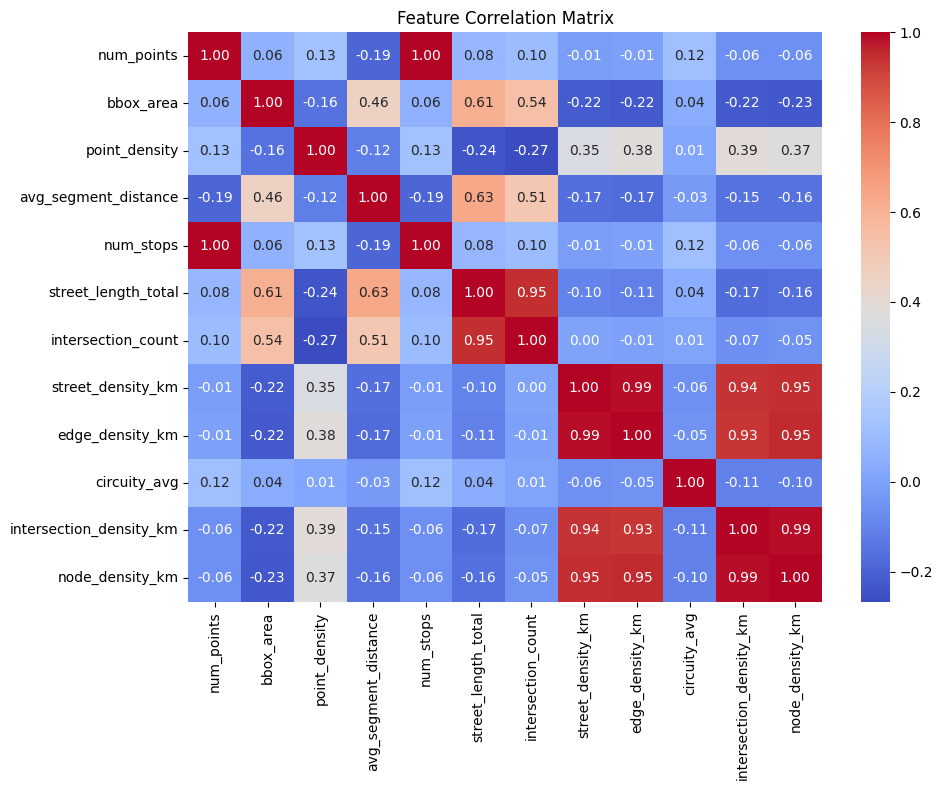

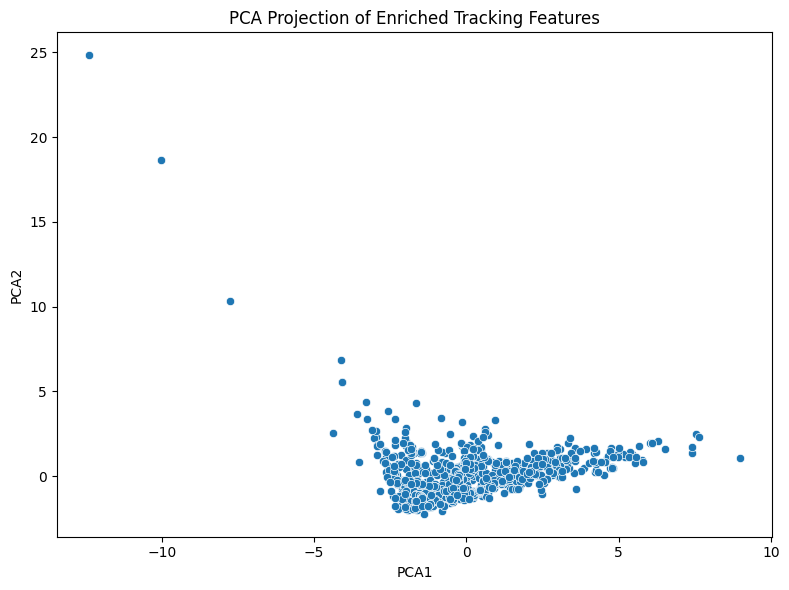

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("../1_Enrich_Data/tracking_osm_convexhull.csv")  
print("data:", df.shape)

display(df.head())
display(df.describe())
display(df.isna().sum())

feature_columns = [col for col in df.columns if col != "tracking_id"]
X = df[feature_columns].fillna(0) 

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df["tracking_id"] = df["tracking_id"]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2")
plt.title("PCA Projection of Enriched Tracking Features")
plt.tight_layout()
plt.show()
